In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

311 Dataset - 311 service requests in Pittsburgh. Requests are collected from the following: phone calls, tweets, emails, a form on the City website, and through the 311 mobile application

In [4]:
pgh_311_data = pd.read_csv('https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4', index_col = "REQUEST_ID")
pgh_311_data

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585436.0,2021-12-07T09:16:00,Snow/Ice removal,Call Center,0,DPW - Street Maintenance,Fineview,6.0,26.0,4.200325e+10,1.0,26.0,1.0,1-22,-80.003203,40.467461,EXACT
585437.0,2021-12-07T09:19:00,Missed Recycling Pick Up,Call Center,0,DPW - Refuse,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,-79.922709,40.472760,APPROXIMATE
585438.0,2021-12-07T09:20:00,Barking Dog,Call Center,0,Animal Care & Control,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,-79.939447,40.470148,APPROXIMATE


# Neighborhood with the most 311 call requests

In [5]:
pgh_311_data['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)

Brookline               22782
Carrick                 21760
Squirrel Hill South     18918
South Side Slopes       18519
South Side Flats        16843
                        ...  
East Carnegie             533
Northview Heights         527
Glen Hazel                370
Arlington Heights         113
Mount Oliver Borough       61
Name: NEIGHBORHOOD, Length: 91, dtype: int64

Since we want the most up to date information on the status of the 311 requests where 0 = new, according to the Data Dictionary, we will filter out the dataset

In [6]:
filtered_pgh_311_data = pgh_311_data[pgh_311_data.STATUS == 0]
filtered_pgh_311_data

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
179176.0,2017-08-14T14:00:00,Neighborhood Issues,Control Panel,0,NaN,Middle Hill,6.0,5.0,4.200305e+10,3.0,5.0,2.0,2-1,-79.977726,40.446142,APPROXIMATE
182748.0,2017-08-28T12:49:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.029944,40.486596,APPROXIMATE
184662.0,2017-09-05T13:49:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.027634,40.470334,APPROXIMATE
167825.0,2017-07-06T15:26:00,Illegal Dumping,Control Panel,0,DOMI - Permits,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-20,-79.997763,40.452695,APPROXIMATE
170189.0,2017-07-14T15:37:00,Mayor's Office,Call Center,0,311,Bloomfield,7.0,8.0,4.200308e+10,2.0,8.0,5.0,2-23,-79.948119,40.455066,APPROXIMATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585436.0,2021-12-07T09:16:00,Snow/Ice removal,Call Center,0,DPW - Street Maintenance,Fineview,6.0,26.0,4.200325e+10,1.0,26.0,1.0,1-22,-80.003203,40.467461,EXACT
585437.0,2021-12-07T09:19:00,Missed Recycling Pick Up,Call Center,0,DPW - Refuse,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,-79.922709,40.472760,APPROXIMATE
585438.0,2021-12-07T09:20:00,Barking Dog,Call Center,0,Animal Care & Control,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,-79.939447,40.470148,APPROXIMATE


Then we will find the neighborhoods with the most requests as of recently

In [9]:
requests = filtered_pgh_311_data['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)
requests

Carrick                      1291
Brookline                    1203
Squirrel Hill South           979
Central Business District     864
Mount Washington              832
                             ... 
Ridgemont                      26
Northview Heights              25
Chartiers City                 17
Mount Oliver Borough            3
Arlington Heights               2
Name: NEIGHBORHOOD, Length: 91, dtype: int64

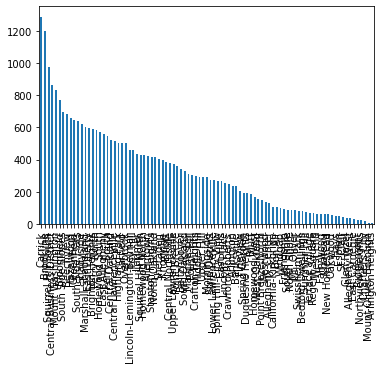

In [10]:
requests.plot.bar()

This graph is disorganized so now we will filter it out by looking at the greatest and least ten neighborhoods regarding 311 calls

# The 10 neighborhoods with the greatest number of calls

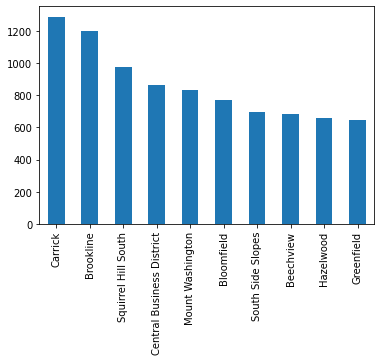

In [11]:
requests.head(10).plot.bar()

# The 10 neighborhoods with the least number of calls

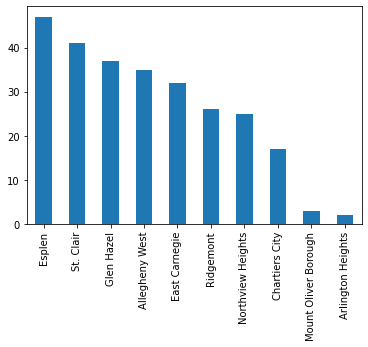

In [12]:
requests.tail(10).plot.bar()

Comparing the greatest and least 10 neighborhoods

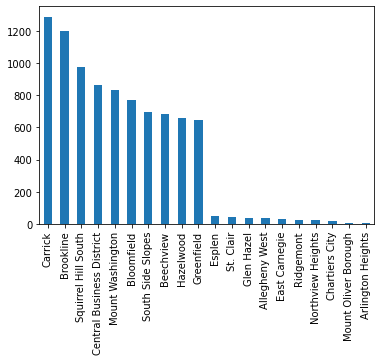

In [13]:
greatestandleast = requests.head(10).append(requests.tail(10))
greatestandleast.plot.bar()

In [14]:
query_mask = filtered_pgh_311_data['NEIGHBORHOOD'] == "Arlington Heights"
arlingtonheights = filtered_pgh_311_data[query_mask]
arlingtonheights["REQUEST_TYPE"].count()

2

This query mask is to emphasize that Arlington Heights had only two requests, the least amount out of all the neighborhoods in the dataset 

# Conclusion

As shown in the plot above, Arlington Heights has the least amount of 311 calls throughout the Pittsburgh neighborhoods. This is considered the "best" neighborhood since "best" is in terms of safety. Since a low amount of 311 calls/reports = quiet and quiet = safe